## Linear Regression for Diabetes dataset


Import needed libraries

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection
import pandas as pd

- TO-DO:

Load the diabetes dataset, divided into `X` data and `y` features in a Dataframe format:

- Hint: use a prompt for Gemini (inside Google Colab, if you want to keep record of it you need to use it outside via your email account).

**It should look like the following:**



In [5]:
# Print the DataFrame
#print(df)
df = datasets.load_diabetes()
df_diabetes = pd.DataFrame(df.data, columns=df.feature_names)
df_diabetes['target'] = df.target
df_diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


Load the diabetes dataset, divided into `X` data and `y` features (as arrays):

In [6]:
X, y = datasets.load_diabetes(return_X_y=True)
print(X.shape)
print(X[0])

(442, 10)
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]


In [7]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [8]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [9]:
print(y.shape)
print(y[0])

(442,)
151.0


Select just one feature to target for this exercise

In [10]:
# Selecting the 3rd feature
X = X[:, 2]
print(X.shape)
print(X[0])
X

(442,)
0.061696206518683294


array([ 0.06169621, -0.05147406,  0.04445121, -0.01159501, -0.03638469,
       -0.04069594, -0.04716281, -0.00189471,  0.06169621,  0.03906215,
       -0.08380842,  0.01750591, -0.02884001, -0.00189471, -0.02560657,
       -0.01806189,  0.04229559,  0.01211685, -0.0105172 , -0.01806189,
       -0.05686312, -0.02237314, -0.00405033,  0.06061839,  0.03582872,
       -0.01267283, -0.07734155,  0.05954058, -0.02129532, -0.00620595,
        0.04445121, -0.06548562,  0.12528712, -0.05039625, -0.06332999,
       -0.03099563,  0.02289497,  0.01103904,  0.07139652,  0.01427248,
       -0.00836158, -0.06764124, -0.0105172 , -0.02345095,  0.06816308,
       -0.03530688, -0.01159501, -0.0730303 , -0.04177375,  0.01427248,
       -0.00728377,  0.0164281 , -0.00943939, -0.01590626,  0.0250506 ,
       -0.04931844,  0.04121778, -0.06332999, -0.06440781, -0.02560657,
       -0.00405033,  0.00457217, -0.00728377, -0.0374625 , -0.02560657,
       -0.02452876, -0.01806189, -0.01482845, -0.02991782, -0.04

In [11]:
#Reshaping to get a 2D array
X = X.reshape(-1, 1)
print(X.shape)
print(X)

(442, 1)
[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 

Split the training and test data for both `X` and `y`

In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33)

Select the model and fit it with the training data

In [13]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Use test data to predict a line

In [14]:
y_pred = model.predict(X_test)

Display the results in a plot

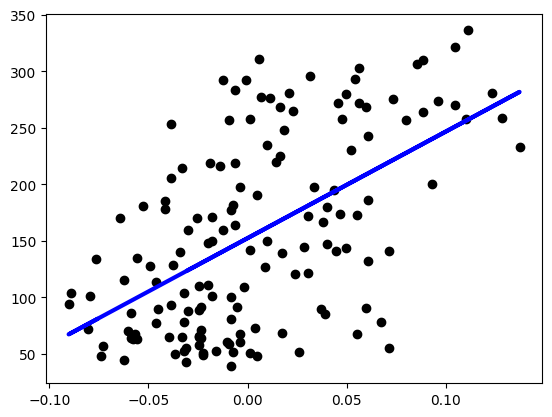

In [15]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()

In [16]:
import pandas as pd
import seaborn as sns

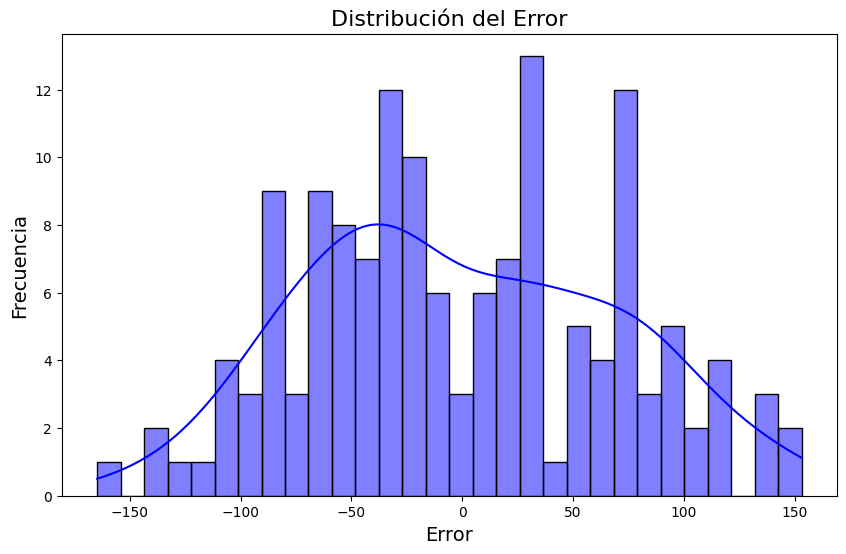

In [17]:
#Calculo para hallar el error
error = y_test - y_pred

#Prompt ChatGPT: como graficar la distribución del error de mi dataset

# Crear el gráfico de distribución del error
plt.figure(figsize=(10, 6))
sns.histplot(error, bins=30, kde=True, color='blue')

# Añadir títulos y etiquetas
plt.title('Distribución del Error', fontsize=16)
plt.xlabel('Error', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.show()

<ipython-input-26-f3ba7af43439>:2: RuntimeWarning: invalid value encountered in sqrt
  error_sq = (y_test - y_pred)**0.5


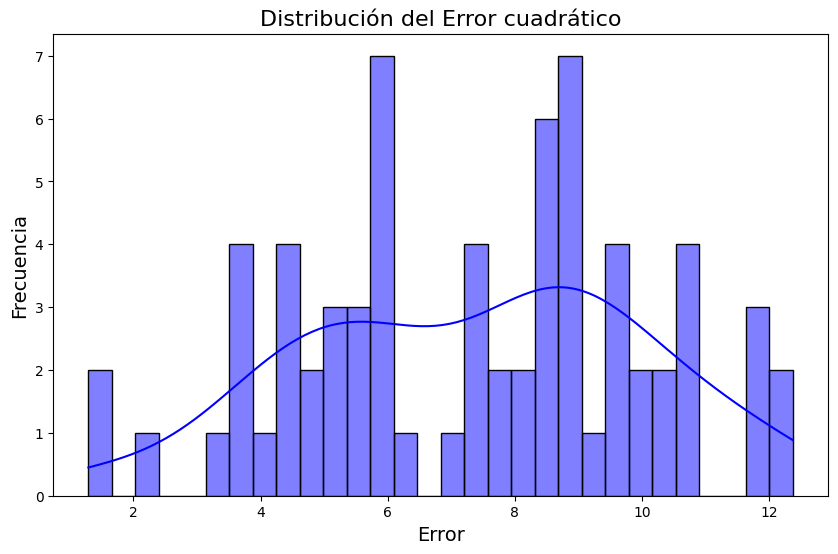

In [26]:
#Calculo para hallar el error cuadratico
error_sq = (y_test - y_pred)**0.5

#Prompt ChatGPT: como graficar la distribución del error de mi dataset

# Crear el gráfico de distribución del error cuadrático
plt.figure(figsize=(10, 6))
sns.histplot(error_sq, bins=30, kde=True, color='blue')

# Añadir títulos y etiquetas
plt.title('Distribución del Error cuadrático', fontsize=16)
plt.xlabel('Error', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadratico medio MSE:", mse)

Error cuadratico medio MSE: 4791.931722957908


In [40]:
# Calcular el error cuadrático medio manual(MSE)
def MSE (y_test, y_pred):
 MSE = np.mean((y_test - y_pred)**2)
 return MSE
print("Error cuadratico medio MSE manual:", MSE(y_test, y_pred))

Error cuadratico medio MSE manual: 4791.931722957908


In [21]:
# Cálculo del RMSE
rmse = np.sqrt(mse)
print("Raíz del error cuadratico medio RMSE:", rmse)

Raíz del error cuadratico medio RMSE: 69.223780039506


In [41]:
# Cálculo del RMSE manual
def RMSE (y_test, y_pred):
  RMSE = (np.mean((y_test - y_pred)**2))**0.5
  return RMSE
print("Raíz del error cuadratico medio RMSE manual:", RMSE(y_test, y_pred))

Raíz del error cuadratico medio RMSE manual: 69.223780039506


In [32]:
from sklearn.metrics import mean_absolute_error

# Cálculo del promedio de errores absolutos
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

MAE: 58.74439881918141


In [42]:
# Cálculo del promedio de errores absolutos manual
def MAE (y_test, y_pred):
  MAE = np.mean(np.abs(y_test - y_pred))
  return MAE
print('MAE manual:', MAE(y_test, y_pred))

MAE manual: 58.74439881918141


In [23]:
from sklearn.metrics import r2_score

# Cálculo del coeficiente de determinación
r2 = r2_score(y_test, y_pred)
print('R2:', r2)

R2: 0.320144316115598


In [43]:
# Cálculo del coeficiente de determinación manual
def R2 (y_test, y_pred):
  R2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2))
  return R2
print('R2 manual:', R2(y_test,y_pred))

R2 manual: 0.320144316115598


In [44]:
# Cálculo del error de porcentaje medio absoluto
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE:',mape,'%')

MAPE: 55.52319719385288 %
